In [1]:
import os, shutil

In [2]:
!pwd

/notebooks/sharedfolder/deep-learning-keras


In [3]:
original_dataset_dir ='/notebooks/sharedfolder/data/cats_and_dogs_original/train'

train_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/train/'
validation_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/validation/'
test_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/test/'

train_cats_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/train/cats/'
validation_cats_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/validation/cats/'
test_cats_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/test/cats/'

train_dogs_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/train/dogs/'
validation_dogs_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/validation/dogs/'
test_dogs_dir = '/notebooks/sharedfolder/data/cats_and_dogs_small/test/dogs/'

In [8]:
'''
## RUN THIS CELL ONE TIME ONLY
## copy the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

## copy the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

## copy the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)



## copy the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

## copy the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

## copy the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
'''

In [4]:
## sanity check data samples
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [5]:
## instantiate a small convnet for dogs vs cats classification
from keras import layers
from keras import models

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [8]:
## pre-process image data
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = train_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
## fit the model
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 29s 291ms/step - loss: 0.6869 - acc: 0.5515 - val_loss: 0.6589 - val_acc: 0.6140
Epoch 2/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6462 - acc: 0.6220 - val_loss: 0.7025 - val_acc: 0.5440
Epoch 3/30
100/100 [==============================] - 16s 155ms/step - loss: 0.5938 - acc: 0.6775 - val_loss: 0.7201 - val_acc: 0.5960
Epoch 4/30
100/100 [==============================] - 16s 157ms/step - loss: 0.5568 - acc: 0.7035 - val_loss: 0.5871 - val_acc: 0.6960
Epoch 5/30
100/100 [==============================] - 16s 155ms/step - loss: 0.5239 - acc: 0.7470 - val_loss: 0.5996 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 16s 157ms/step - loss: 0.4960 - acc: 0.7530 - val_loss: 0.5703 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 16s 156ms/step - loss: 0.4695 - acc: 0.7725 - val_loss: 0.5441 - val_acc: 0.7230
Epoch 8/30
100/100 [==============================] - 1

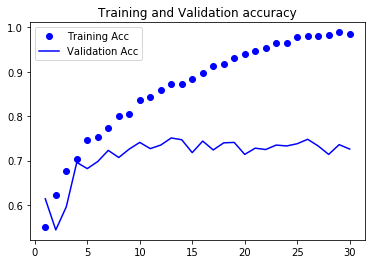

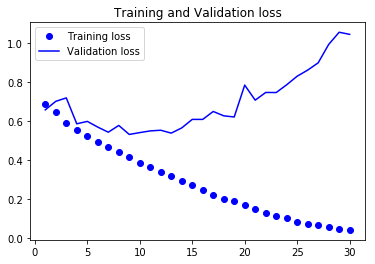

In [12]:
import matplotlib.pyplot as plt
##training accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = "Training Acc")
plt.plot(epochs, val_acc, 'b', label = "Validation Acc")
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [17]:
#### Lets try data augmentation to deal with overfitting
# data augmentation configuration
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [27]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[0]
img = image.load_img(img_path, target_size=(150,150))

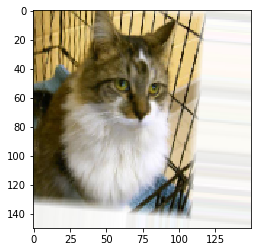

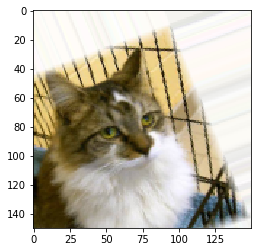

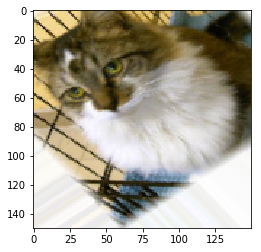

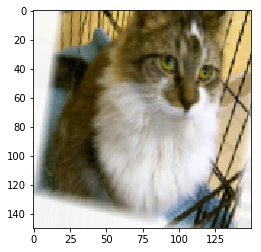

In [28]:
x = image.img_to_array(img)
x= x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i%4 == 0:
        break
plt.show()        

In [29]:
#### lets define a new convnet with a dropout layer 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [30]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [32]:
# data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = train_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
## fit the model
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 51s 507ms/step - loss: 0.6927 - acc: 0.5247 - val_loss: 0.6830 - val_acc: 0.5831
Epoch 2/100
100/100 [==============================] - 47s 469ms/step - loss: 0.6796 - acc: 0.5637 - val_loss: 0.6718 - val_acc: 0.5438
Epoch 3/100
100/100 [==============================] - 47s 471ms/step - loss: 0.6619 - acc: 0.6009 - val_loss: 0.6532 - val_acc: 0.6313
Epoch 4/100
100/100 [==============================] - 47s 474ms/step - loss: 0.6470 - acc: 0.6153 - val_loss: 0.6251 - val_acc: 0.6510
Epoch 5/100
100/100 [==============================] - 47s 473ms/step - loss: 0.6303 - acc: 0.6438 - val_loss: 0.6218 - val_acc: 0.6377
Epoch 6/100
100/100 [==============================] - 50s 497ms/step - loss: 0.6144 - acc: 0.6616 - val_loss: 0.6008 - val_acc: 0.6694
Epoch 7/100
100/100 [==============================] - 47s 474ms/step - loss: 0.6020 - acc: 0.6684 - val_loss: 0.6490 - val_acc: 0.6193
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 47s 474ms/step - loss: 0.4092 - acc: 0.8166 - val_loss: 0.4653 - val_acc: 0.7722
Epoch 62/100
100/100 [==============================] - 50s 498ms/step - loss: 0.4070 - acc: 0.8163 - val_loss: 0.4838 - val_acc: 0.7519
Epoch 65/100
100/100 [==============================] - 47s 474ms/step - loss: 0.3922 - acc: 0.8200 - val_loss: 0.4440 - val_acc: 0.7874
Epoch 66/100
100/100 [==============================] - 47s 468ms/step - loss: 0.4129 - acc: 0.8075 - val_loss: 0.4615 - val_acc: 0.7874
Epoch 67/100
100/100 [==============================] - 47s 474ms/step - loss: 0.3858 - acc: 0.8278 - val_loss: 0.4752 - val_acc: 0.7855
Epoch 68/100
100/100 [==============================] - 48s 484ms/step - loss: 0.3954 - acc: 0.8238 - val_loss: 0.4567 - val_acc: 0.7665
Epoch 69/100
100/100 [==============================] - 50s 500ms/step - loss: 0.3836 - acc: 0.8247 - val_loss: 0.4474 - val_acc: 0.7874
Epoch 70/100
100/100 [===================

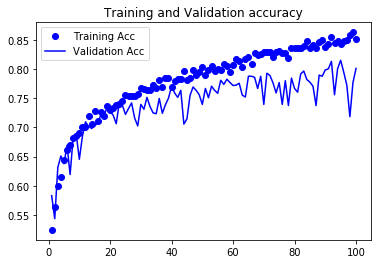

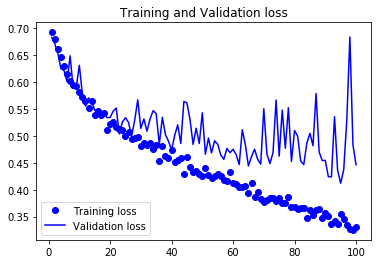

In [36]:
import matplotlib.pyplot as plt
##training accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = "Training Acc")
plt.plot(epochs, val_acc, 'b', label = "Validation Acc")
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool